Group 4;

---


Group Members: 

*   Brahushi, Gazmira
*   Patel, Khaleel
*   Jivnani, Ravina
*   Parmar, Niravkumar
*   Issac, Dennis

Course code:  AIDI_1100; submission date: 18-04-2022(DD-MM-YYYY)

---

This project consists of 4 mandatory parts,one extra part and one the optional part: 
1.   Scan/sparse: is implemented in the function get_news_data, it contains the instructions: 1.the url is composed 2. the get request is executed for the news url and 3. parsing the request by using BeautifulSoap and the parser html5lib.
2.   Track/Store: a. is implemented in the function get_news_data by localising the div class which contains the news information for the specified period of time. After accessing the information, the function stores it on the excel file
b.is implemented the function get_stock_data, which is called inside get_news_data and has an array parameter from which are extracted all the tickers with the pattern NASDAQ:
1.   Retrieve Data consists of a. selecting randomly three stock symbols 
and b.get_ticker_info function which prints stock data(volume, price)
2.   Visualize consists of function: **1**.plot_time_series, which plots dinamically 2 time series using plotly, one for Volume and another for Closing Price, the results on the graphs appear for different periode of time(monthly, for 6 months,Year to date (YTD) refers to the period of time beginning the first day of the current calendar year or fiscal year up to the current date, yearly and all. 

**Extra part 
1. **Candlestick function, which plots candlestick chart for each ticker in data for the same period as the 1st function.** **All charts have the feature stepmode="backward", which does the charts user-interactive to go back and forward** 

Optional part
1. **Recommend if Any of the stocks is worth purchasing or not based on slop of the close prices of the stock of last 6 month**

Modules and libraries used

*   yfinance
*   BeautifulSoup
*   requests
*   datetime
*   re
*   plotly.express
*   plotly.graph_objects
*   matplotlib.pyplot
*   random



# **Part 1 and 2**

In [18]:
# Installing the yfinance module
# For more... https://github.com/ranaroussi/yfinance
!pip3 install yfinance

In [19]:
# Importing libraries
from bs4 import BeautifulSoup
import requests
import datetime
import pandas as pd
import re
import yfinance as yf


In [20]:
def get_stock_data(stock_df):
    #search on the stock_df dataframe for ")" and replace with empty string
    stock_df[0] = stock_df[0].str.replace(')' , '', regex = True)
    #search on the stock_df dataframe for "," and replace with empty string
    stock_df[0] = stock_df[0].str.replace(',' , '', regex = True)
    #search on the stock_df dataframe for "(" and replace with empty string
    stock_df[0] = stock_df[0].str.replace('(' , '', regex = True)
    #search on the stock_df dataframe for "/" and replace with empty string
    stock_df[0] = stock_df[0].str.replace('/' , '', regex = True)
    #search on the stock_df dataframe for "Nasdaq:" and replace with empty string
    stock_df[0] = stock_df[0].str.replace('Nasdaq:' , '', regex = True)
    #search on the stock_df dataframe for "NASDAQ:" and replace with empty string
    stock_df[0] = stock_df[0].str.replace('NASDAQ:' , '', regex = True)
    #search on the stock_df dataframe for any space and replace with empty string
    stock_df[0] = stock_df[0].str.replace(' ' , '', regex = True)
    #store the data into excel file
    stock_df.to_excel('stock_symbols.xlsx', index = False, header = False, sheet_name="Stock_Sybmols")
    stock_symbols = pd.read_excel('stock_symbols.xlsx')
    #get a copy of the stock_symbols into a one dimension array
    stock_symbols_arr = stock_symbols.values.flatten()

    return stock_symbols_arr

In [21]:
#function definition with arguments start_date, end_date, main_url, page_number
def get_news_data(start_date, end_date, main_url, page_number):
    while True:
      # the url composition, is important to composite the news_url the same as it appears in the browser
        url = main_url+"month="+start_date[0]+"&day="+start_date[1]+"&year="+start_date[2]+"&hour=23&pagesize=100&page="+str(page_number)
        print(url)
        # requests is an HTTP library which gets the content of the above url
        req = requests.get(url)
        # create e BeautifulSoup object by passing as parameters the text content of the request and the parser html5lib, which creates valid HTML5 content
        soup = BeautifulSoup(req.text, 'html5lib')
        #close the connection, since we have the content now on variable soup
        req.close()
        # for loop to find the content of all div-s with class row arabiclistingcards and English language articles only
        for div in soup.find_all("div", class_="row arabiclistingcards", lang = "en-US"):

            date_time_temp = div.find("small").text.replace(",", " ").split()
            month = months[date_time_temp[0]]
            # appends into the date list in this format MM/DD/YYYY
            date.append(str(month)+"/"+date_time_temp[1]+"/"+date_time_temp[2])
            # last_date variable contains a copy of date variable
            last_date = str(month)+"/"+date_time_temp[1]+"/"+date_time_temp[2]
            # appends into the time list when the news is published
            time.append(date_time_temp[3]) 
            # finds the content of h3 text 
            remove_small = div.find("h3").text
            # appends h3 text into a title list
            title.append(remove_small.split('\n')[2].strip()) 
            # appends the paragraph content into a content list
            content.append(div.find("p").text)     

        if last_date <= end_date:
            break
        elif page_number >= 100:
            page_number = 1
            start_date = last_date.split("/")
        else:
            page_number = page_number + 1
    # dictionary creation with headers Date, Time,Title, Content
    data = {
        "Date":date,
        "Time":time,
        "Title":title,
        "Content":content
    }
    # convert the dictionary into DataFrame
    df = pd.DataFrame(data)
    # save the dataframe content into Excel file,with no index, no header and with the sheet_name News_Details
    df.to_excel('news_data.xlsx', index = False, header = False, sheet_name="News_Details")
    # read the excel file into a dataframe
    df = pd.read_excel('news_data.xlsx', index_col = 0, header = None)
    # take the 3rd column from the dataframe
    series_df = df[2].reset_index(drop=True).squeeze()
    # extract from that column the pattern which starts with NASDAQ and continues with any stock ticker
    # by ignoring the case
    stock = series_df.str.extractall(pat = '(NASDAQ: .....)', flags = re.IGNORECASE)
    stock_df = pd.DataFrame(stock)
    ''' pass the parameter stock_df to the function stock_data
     which returns all the stock symbols that appear after NASDAQ:
     '''
    stock_symbols_arr = get_stock_data(stock_df)

    return stock_symbols_arr

In [22]:
'''Parameter preparation for the function get_news_data(start_date, end_date, main_url, page_number)
we need all these parameters to compose the news url in the same way as it appears in the browser.
start_date -the current date,
end_date   -the date 15 days before from the current date
main_url   -the initial url without any composition
page_number -stores the value of page number, starts with 1 and goes until 100 (100 this is by default the number of pages when we try to filter in the website)
'''
main_url = "https://www.prnewswire.com/news-releases/news-releases-list/?" 
#Google Colab runs on UTC timezone, corrected to Toronto timezone by subtracting 4 from hours
s_date = (datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=-4))) - datetime.timedelta(days=1)).strftime("%m/%d/%Y") 
end_date = (datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=-4))) - datetime.timedelta(days=15)).strftime("%m/%d/%Y")
start_date = s_date.split("/")
date = list()
time = list()
title = list()
content = list()
page_number=1
months = dict(Jan="01", Feb="02", Mar="03", Apr="04", May="05", Jun="06", Jul="07", Aug="08", Sep="09", Oct="10", Nov="11", Dec="12")
stock_symbols_arr = list()
stock_symbols_arr = get_news_data(start_date, end_date, main_url, page_number)

https://www.prnewswire.com/news-releases/news-releases-list/?month=04&day=17&year=2022&hour=23&pagesize=100&page=1
https://www.prnewswire.com/news-releases/news-releases-list/?month=04&day=17&year=2022&hour=23&pagesize=100&page=2
https://www.prnewswire.com/news-releases/news-releases-list/?month=04&day=17&year=2022&hour=23&pagesize=100&page=3
https://www.prnewswire.com/news-releases/news-releases-list/?month=04&day=17&year=2022&hour=23&pagesize=100&page=4
https://www.prnewswire.com/news-releases/news-releases-list/?month=04&day=17&year=2022&hour=23&pagesize=100&page=5
https://www.prnewswire.com/news-releases/news-releases-list/?month=04&day=17&year=2022&hour=23&pagesize=100&page=6
https://www.prnewswire.com/news-releases/news-releases-list/?month=04&day=17&year=2022&hour=23&pagesize=100&page=7
https://www.prnewswire.com/news-releases/news-releases-list/?month=04&day=17&year=2022&hour=23&pagesize=100&page=8
https://www.prnewswire.com/news-releases/news-releases-list/?month=04&day=17&yea

In [23]:
stock_symbols_arr

array(['LIXT', 'MYPS', 'LCID', 'RIVN', 'FIXX', 'GRAB', 'CELH', 'TASK',
       'AFIB', 'AKBA', 'ERIC', 'AFRM', 'CABA', 'CRNC', 'SPWR', 'MYPS',
       'MYPS', 'MYPS', 'CSCW', 'ASTR', 'SPWR', 'TASK', 'CRNC', 'CABA',
       'AFRM', 'ERIC', 'RIVN', 'CELH', 'GRAB', 'AFIB', 'FENC', 'LCID',
       'FIXX', 'AKBA', 'CSCW', 'AKBA', 'AKBA', 'RIVN', 'RIVN', 'GRAB',
       'GRAB', 'FIXX', 'FIXX', 'EMBK', 'EMBK', 'ERIC', 'LCID', 'LCID'],
      dtype=object)

# **Part 3**

In [24]:
# Importing libraries for plotting
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import random

In [25]:
def get_ticker_info(ticker_list):
  ''' this function takes as argument the ticker list(3 of them) which would be randomly extracted by the stock_symbols_arr
  and prints some information for the tickers such as shortname, volume and current_price.
  ''' 
  # Empty dictionary to store ticker and related data
  # k:v -> ticker:stock price data
  data = {}
  name = {}

  for ticker in ticker_list:
    # Creating a yfinance object
    ticker_info = yf.Ticker(ticker)
    # Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
    # 5y, 10y and ytd.
    # Fetching past 6 months year data
    data[ticker] = ticker_info.history(period="6mo") 
    #get the list of volumes for the 6month period
    volume_list=data[ticker]['Volume'].values
    #get the list of high price values for the 6month period
    highprice_list=data[ticker]['High'].values
    #get the name of the ticker 
    name[ticker] = ticker_info.info["shortName"]
    print("The stock price for", ticker_info.info["shortName"], " is ", ticker_info.info["currentPrice"], "and the stock volume is ", ticker_info.info["volume"], ".")
    print("Volumes for 6 months are", volume_list)
    print("High price values for 6 months are", highprice_list)
    
    

In [26]:
# Generating 3 random indexes
#print(stock_symbols_arr)
random_indexes = random.sample(range(0, len(stock_symbols_arr)), 3)

In [27]:
# Selecting 3 random tickers from symbol list
ticker_list = [stock_symbols_arr[index] for index in random_indexes]

In [28]:
# Tickers selected
ticker_list

['GRAB', 'ASTR', 'AKBA']

In [29]:
get_ticker_info(ticker_list)

The stock price for Grab Holdings Limited  is  3.05 and the stock volume is  15774030 .
Volumes for 6 months are [  2807100   2772300   9394100  11807200  10371100  18230700   7133400
   3385700   2147800   2259300   2521400   1021600   1752600    930500
    931400  44671300   7915700   8652900   8099700   4232500   3690400
   2752900   2539100   3620500   3137900   2163200   3053900   1915400
   2974900   3815200   8964400  35751200  29667200  25416000  25775900
  26187700  36086700  39572600  16689400  32797900  26431500  21053300
  21849400   9573800   5539700   4354100  13381700  11855800  13889400
   7289300   7295300   8813500   4685500   5867700  30569400  18589000
  20806900  25171000  32226700  12255500  23936200  14430600  37366700
  15743900  19200700  41267600  26709000  23614100  49730900  35972700
  34813100  15311400   8873400   7885400  14941100  16123000   8767900
   6864200   8462600  60463400  25100600  21790500  18128000  14953900
  12389300  16555500  27064600  254

# **Part 4**

In [30]:
# Function to plot 2 time series using plotly, one for Volume and another for Closing Price
def plot_time_series(ticker, df, nm_df):
  # Inputs: ticker symbol, and related DataFrame
  # To plot Volume
  fig = px.line(df, x=df.index, y="Volume", title= (nm_df+" "+ticker))
  # Adding range slider and buttons for ranges
  fig.update_xaxes(
      rangeslider_visible=True,
      rangeselector=dict(
          buttons=list([
              dict(count=1, label="1m", step="month", stepmode="backward"),
              dict(count=6, label="6m", step="month", stepmode="backward"),
              dict(count=1, label="YTD", step="year", stepmode="todate"),
              dict(count=1, label="1y", step="year", stepmode="backward"),
              dict(step="all")
          ])
      )
  )
  fig.show()
  # To plot closing price
  fig = px.line(df, x=df.index, y="Close", title=(nm_df+" "+ticker))
  # Adding range slider and buttons for ranges
  fig.update_xaxes(
      rangeslider_visible=True,
      rangeselector=dict(
          buttons=list([
              dict(count=1, label="1m", step="month", stepmode="backward"),
              dict(count=6, label="6m", step="month", stepmode="backward"),
              dict(count=1, label="YTD", step="year", stepmode="todate"),
              dict(count=1, label="1y", step="year", stepmode="backward"),
              dict(step="all")
          ])
      )
  )
  fig.show()

In [31]:
# Plotting Volume and Close price for each ticker in data
data = {}
name={}
for ticker in ticker_list:
  #get the ticker information
  ticker_info = yf.Ticker(ticker)
  #dict to save the ticker history
  data[ticker] = ticker_info.history(period="6mo") 
  #dict to save the ticker name
  name[ticker] = ticker_info.info["shortName"]
  #pass the parameters to the function
  plot_time_series(ticker, data[ticker], name[ticker])

# **Extra part**




In [32]:
# Function to plot candlestick plot
def candlestick(ticker, df, nm_df):
  fig = go.Figure(data=[go.Candlestick(x=df.index,
                  open=df['Open'],
                  high=df['High'],
                  low=df['Low'],
                  close=df['Close'])])
  # Adding range slider and buttons for ranges
  fig.update_xaxes(
      rangeslider_visible=True,
      rangeselector=dict(
          buttons=list([
              dict(count=1, label="1m", step="month", stepmode="backward"),
              dict(count=6, label="6m", step="month", stepmode="backward"),
              dict(count=1, label="YTD", step="year", stepmode="todate"),
              dict(count=1, label="1y", step="year", stepmode="backward"),
              dict(step="all")
          ])
      )
  )
  fig.update_layout(
    title=(nm_df+" "+ticker)
)

  fig.show()

In [33]:
# Plotting candlestick chart for each ticker in data
data = {}
name={}
for ticker in ticker_list:
  #get the ticker information
  ticker_info = yf.Ticker(ticker)
  #dict to save the ticker history
  data[ticker] = ticker_info.history(period="6mo") 
  #dict to save the ticker name
  name[ticker] = ticker_info.info["shortName"]
  #pass the parameters to the function
  candlestick(ticker, data[ticker], name[ticker])

# **Optional Part**

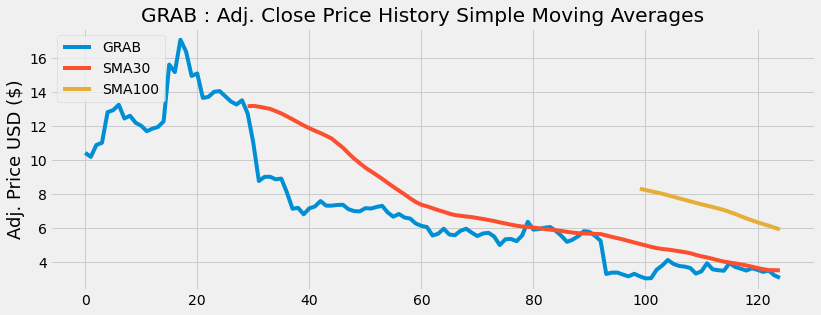

GRAB : based on trend NOT BUY STOCK



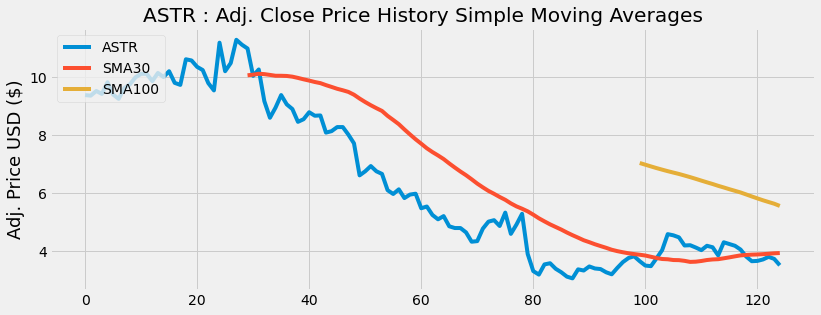

ASTR : based on trend NOT BUY STOCK



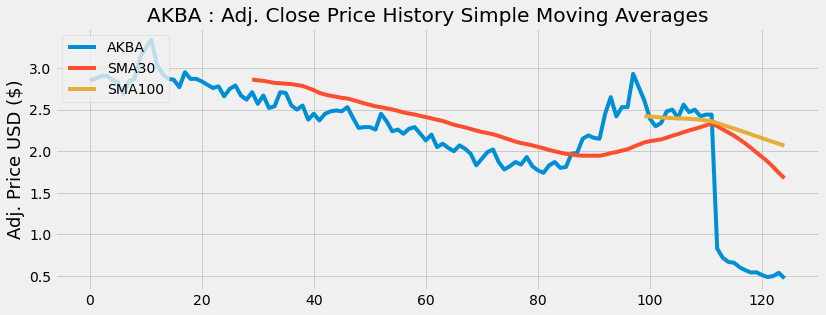

AKBA : based on trend NOT BUY STOCK



In [34]:

import numpy as np

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# if the slope is a +ve value --> increasing trend
# if the slope is a -ve value --> decreasing trend
# if the slope is a zero value --> No trend

def trendline(index,data, order=1):
    coeffs = np.polyfit(index, list(data), order)
    slope = coeffs[-2]
    return float(slope)

# Visualisation of stock trend
def visualize_trend (ticker, data):
  # show a new data frame that contains the stocks adjusted close price.
  df = pd.DataFrame()
  df[ticker] = data[ticker]['Close'].values
  df

  #Create the 30 day simple moving average
  SMA30 = df.rolling(window=30).mean()
  SMA30

  #Create the 100 day simple moving average
  SMA100 = df.rolling(window=100).mean()
  SMA100

  # Visually Show The Stock and The Moving Averages
  # Create the title 
  title = ticker + ' : Adj. Close Price History Simple Moving Averages   '
  #Get the stocks
  my_stocks = df
    
  #Create and plot the graph
  #width = 12.2in, height = 4.5
  plt.figure(figsize=(12.2,4.5)) 
  plt.plot( my_stocks[ticker],  label=ticker)
  plt.plot( SMA30[ticker],  label='SMA30')
  plt.plot( SMA100[ticker],  label='SMA100')
    
  plt.title(title)
  plt.ylabel('Adj. Price USD ($)',fontsize=18)
  plt.legend( loc='upper left')
  plt.show()


data = {}
name={}
result_final = list()
for ticker in ticker_list:
  ticker_info = yf.Ticker(ticker)
  #dict to save the ticker history
  data[ticker] = ticker_info.history(period="6mo") 
  #dict to save the ticker name
  name[ticker] = ticker_info.info["shortName"]

  # Trend visualisation
  visualize_trend(ticker , data)

  #list to get the values of close for the 6 months period of time
  List=data[ticker]['Close'].values.tolist()
  index = list(range(0,len(List)))
  resultent=trendline(index,List)

  if resultent < 0 :
    print(ticker + " : based on trend " + "NOT BUY STOCK\n")
  elif resultent > 0.1:
    print(ticker + " : based on trend " + "BUY STOCK\n")
  else:
    print(ticker + " : based on trend " + "WAIT BEFORE BUYING STOCK\n")


